# First, run this cell to set up paths and import dependencies

In [1]:
%cd ..

import os
import numpy as np
from src.data_processing import load_audio, split_into_clips, create_spectrogram, augment_audio, prepare_datasets
from src.dataset_analysis import plot_spectrogram, dataset_summary
import matplotlib.pyplot as plt
import librosa
from tqdm import tqdm
import shutil

# Configure directories
data_dir = "./data"          # Directory where .wav files are stored
output_dir = "./datasets"    # Directory to store processed spectrograms

# Ensure the output directory structure exists
os.makedirs(output_dir, exist_ok=True)
os.makedirs(f"{output_dir}/train", exist_ok=True)
os.makedirs(f"{output_dir}/val", exist_ok=True)
os.makedirs(f"{output_dir}/test", exist_ok=True)


/home/mytkom/Documents/iml


# 1. Load all .wav files in the provided directory and preview some

In [2]:
wav_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.wav')]
print(f"Found {len(wav_files)} .wav files in directory '{data_dir}'")

Found 100 .wav files in directory './data'


# 2. Split files into train, validation, and test sets

In [3]:
train_files, val_files, test_files = prepare_datasets(data_dir)
print(f"Training files: {len(train_files)} | Validation files: {len(val_files)} | Test files: {len(test_files)}")

# Helper function to save spectrograms to specific directories
def save_spectrogram(spectrogram, output_path):
    plt.imsave(output_path, spectrogram, cmap='gray')


Training files: 64 | Validation files: 16 | Test files: 20


# 3. Process each dataset split by converting 2-second clips into spectrograms

In [4]:
def process_split(file_list, output_subdir):
    for file_path in tqdm(file_list, desc=f"Processing {output_subdir}"):
        audio, sr = load_audio(file_path)
        clips = split_into_clips(audio)

        for i, clip in enumerate(clips):
            spectrogram = create_spectrogram(clip, sr)
            output_path = os.path.join(output_subdir, f"{os.path.basename(file_path).split('.')[0]}_{i}_clip.png")
            save_spectrogram(spectrogram, output_path)

# Generate and save spectrograms for each split
process_split(train_files, f"{output_dir}/train")
process_split(val_files, f"{output_dir}/val")
process_split(test_files, f"{output_dir}/test")


Processing ./datasets/test: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]


# 4. Calculate and display statistics about the dataset

In [5]:

print("\nDataset Statistics:")
print("Training set:")
dataset_summary(train_files)

print("\nValidation set:")
dataset_summary(val_files)

print("\nTest set:")
dataset_summary(test_files)



Dataset Statistics:
Training set:
Total files: 64
Average duration: 159.63 sec
Duration range: 116.16 - 199.72 sec

Validation set:
Total files: 16
Average duration: 161.54 sec
Duration range: 139.54 - 224.20 sec

Test set:
Total files: 20
Average duration: 164.75 sec
Duration range: 131.11 - 198.58 sec


# 5. Visualize some spectrogram examples

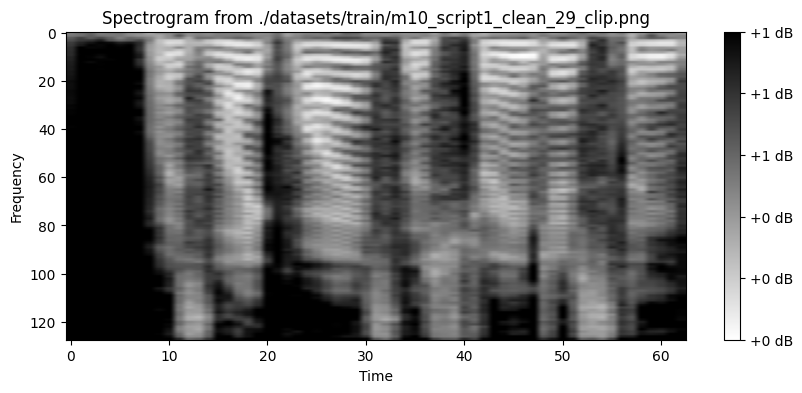

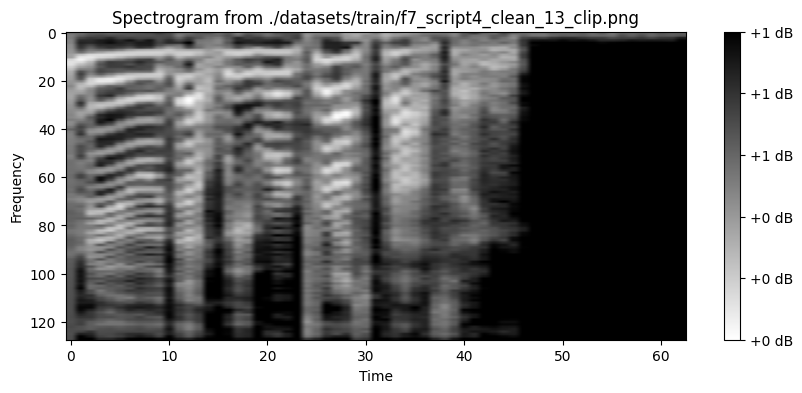

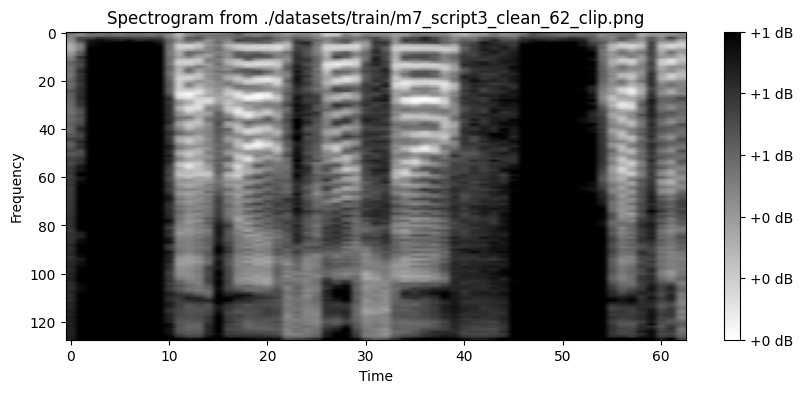

In [6]:
sample_spectrogram_paths = [os.path.join(f"{output_dir}/train", f) for f in os.listdir(f"{output_dir}/train")[:3]]
for path in sample_spectrogram_paths:
    spectrogram = plt.imread(path)
    plot_spectrogram(spectrogram, title=f"Spectrogram from {path}")